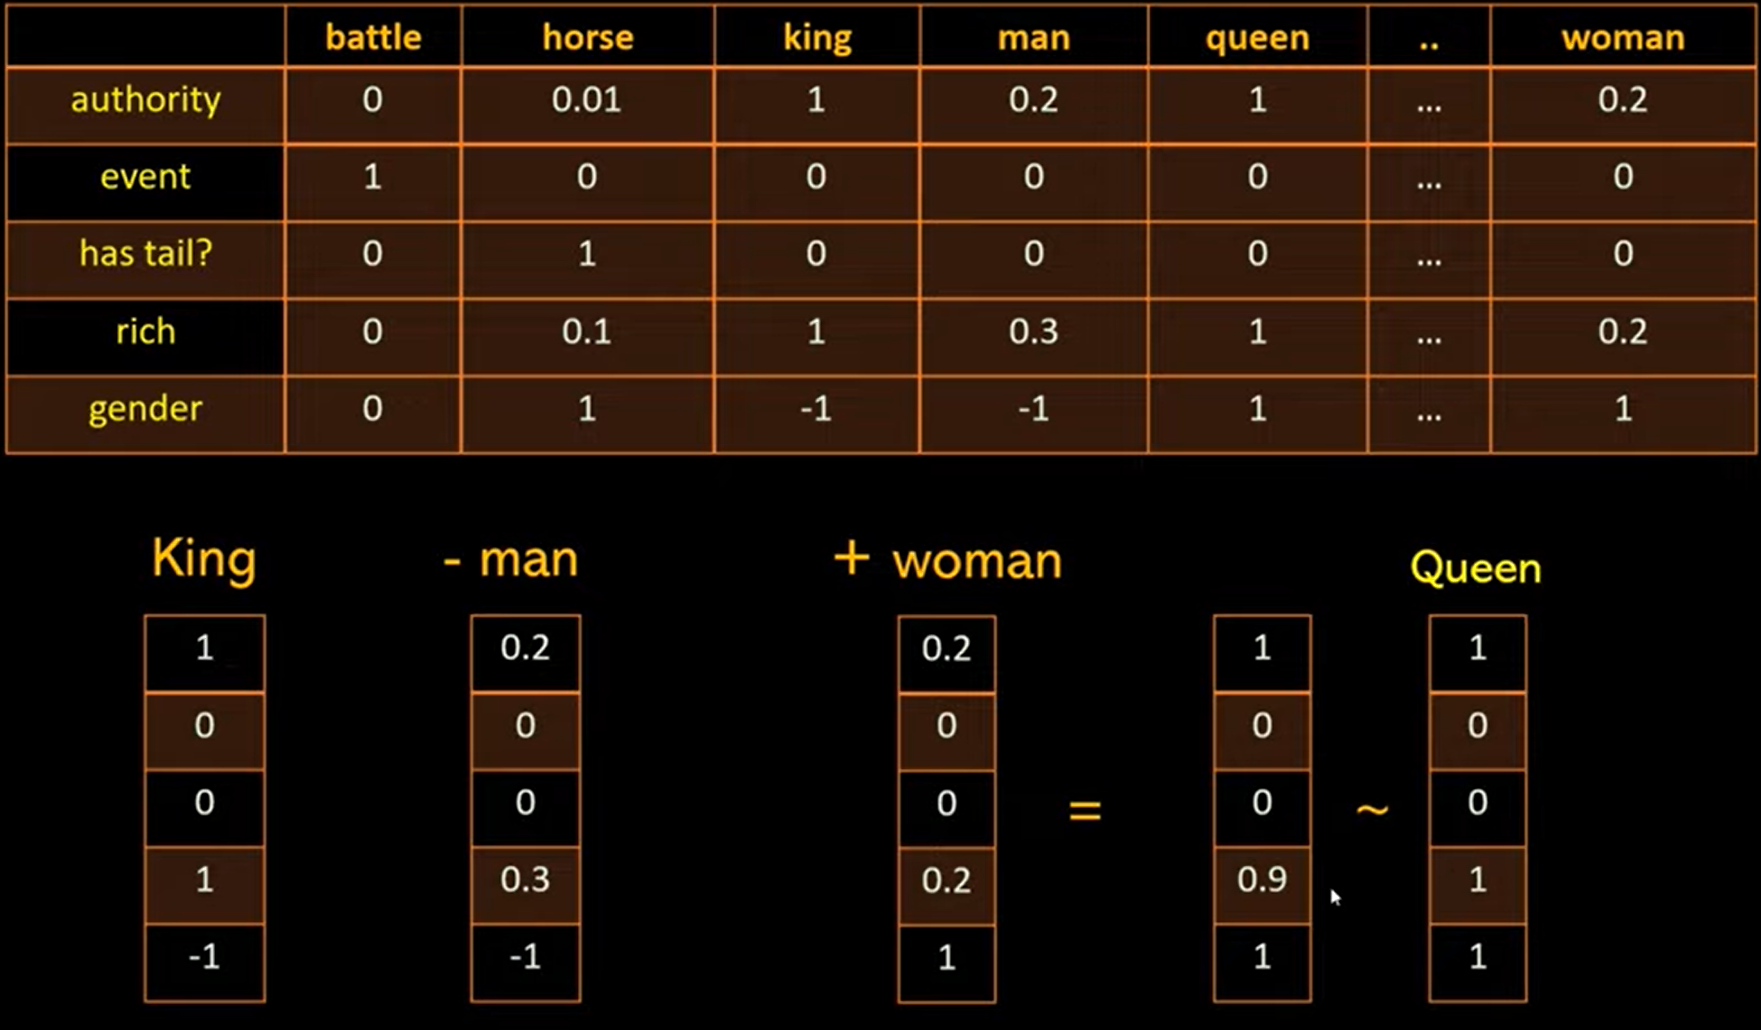

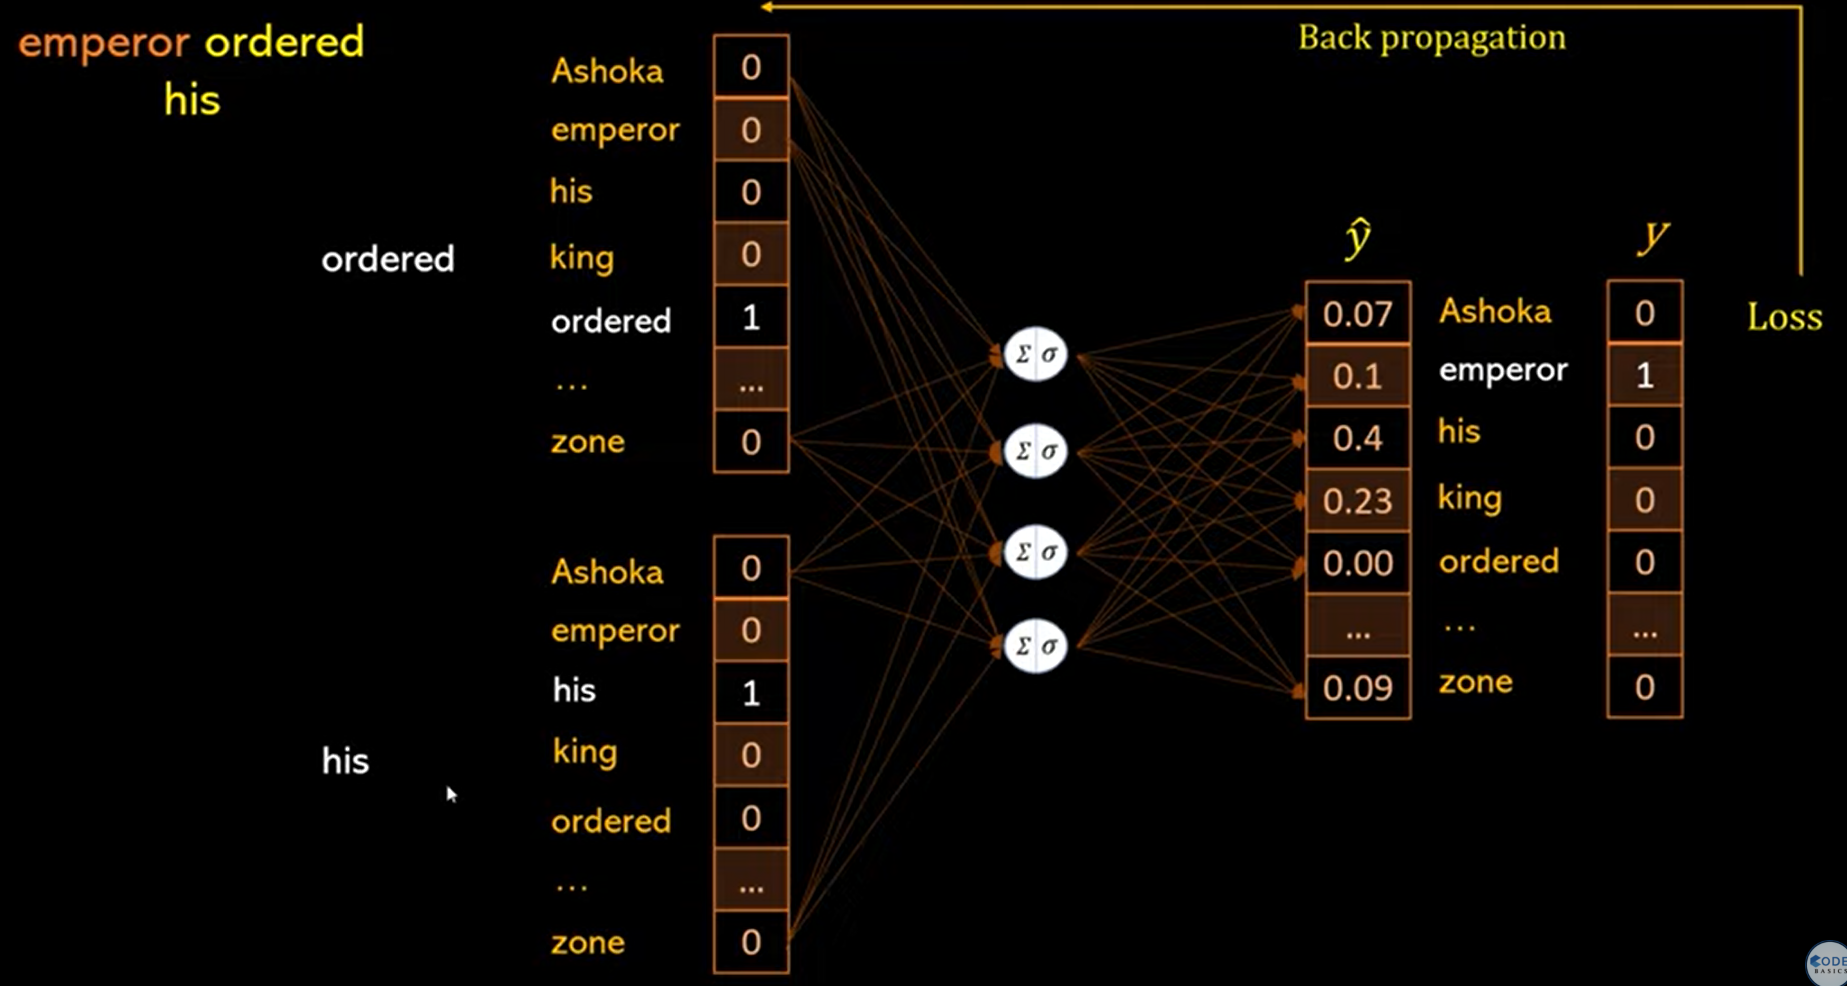

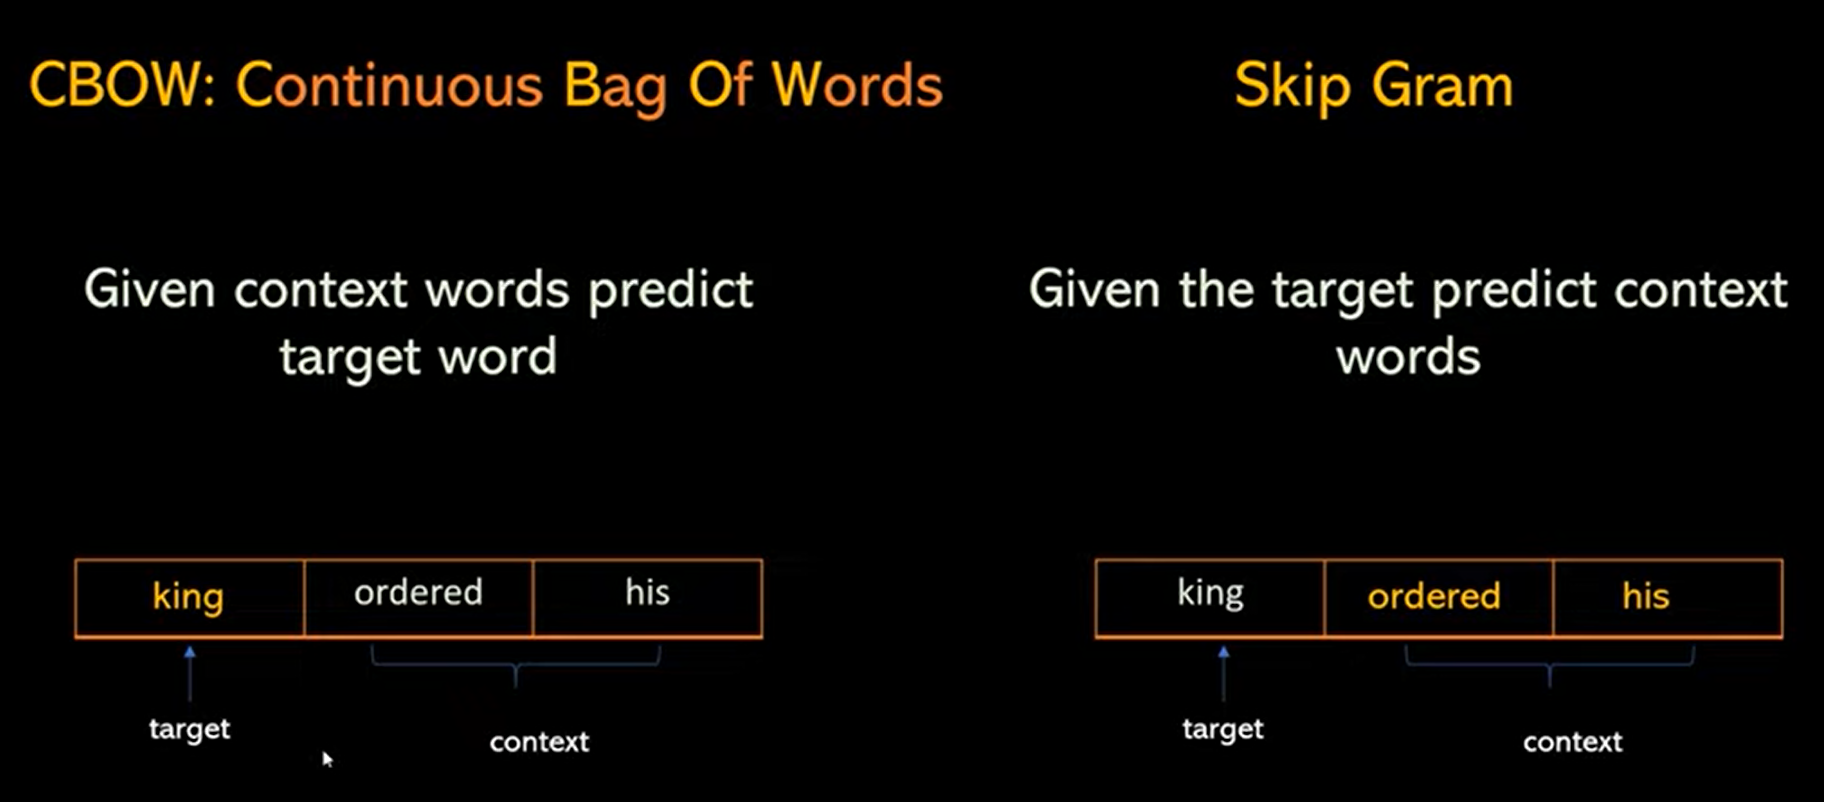

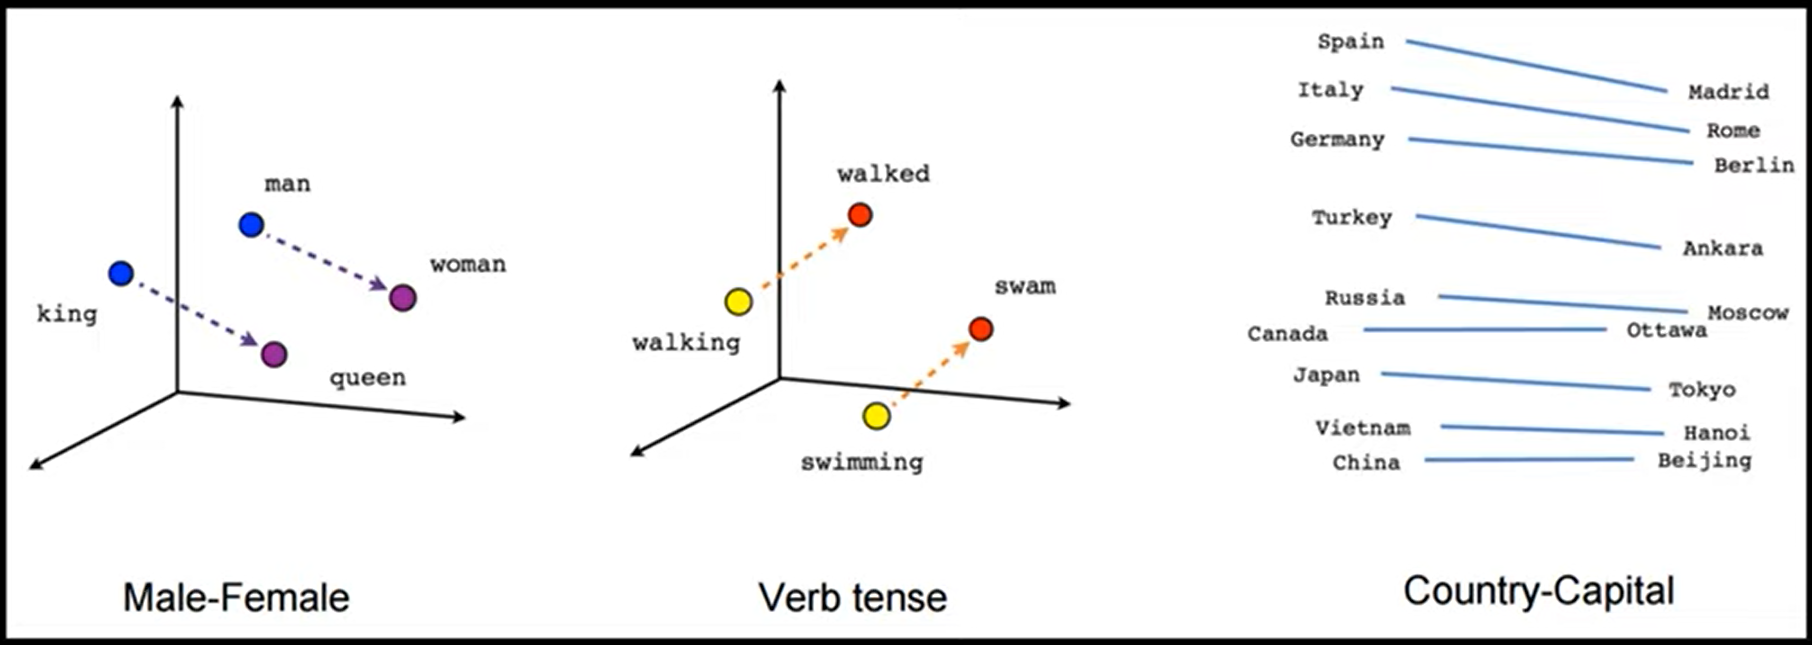

In [22]:
# !pip install gensim
# !pip install python-Levenshtein

In [2]:
import gensim
import pandas as pd

### Reading and Exploring the Dataset
The dataset we are using here is a subset of Amazon reviews from the Cell Phones & Accessories category. The data is stored as a JSON file and can be read using pandas.

Link to the Dataset: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz

In [3]:
df = pd.read_json("Cell_Phones_and_Accessories_5.json", lines=True)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"
...,...,...,...,...,...,...,...,...,...
194434,A1YMNTFLNDYQ1F,B00LORXVUE,eyeused2loveher,"[0, 0]",Works great just like my original one. I reall...,5,This works just perfect!,1405900800,"07 21, 2014"
194435,A15TX8B2L8B20S,B00LORXVUE,Jon Davidson,"[0, 0]",Great product. Great packaging. High quality a...,5,Great replacement cable. Apple certified,1405900800,"07 21, 2014"
194436,A3JI7QRZO1QG8X,B00LORXVUE,Joyce M. Davidson,"[0, 0]","This is a great cable, just as good as the mor...",5,Real quality,1405900800,"07 21, 2014"
194437,A1NHB2VC68YQNM,B00LORXVUE,Nurse Farrugia,"[0, 0]",I really like it becasue it works well with my...,5,I really like it becasue it works well with my...,1405814400,"07 20, 2014"


In [5]:
df.shape

(194439, 9)

### Simple Preprocessing & Tokenization
The first thing to do for any data science task is to clean the data. For NLP, we apply various processing like converting all the words to lower case, trimming spaces, removing punctuations. This is something we will do over here too.

Additionally, we can also remove stop words like 'and', 'or', 'is', 'the', 'a', 'an' and convert words to their root forms like 'running' to 'run'.

In [6]:
# gensim tekonizes the text
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)
review_text

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [8]:
review_text.loc[0]

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [12]:
# gensim is an nlp library and it comes with vec2word

model = gensim.models.Word2Vec(
          window = 10,
          min_count = 2,   #if you have a sentece that have one word don't use it you need at least 2
          workers = 4    # how many cpu pairs you need to use
)

In [14]:
model.build_vocab(review_text, progress_per = 1000)

In [15]:
# it is set to 5 by default
model.epochs

5

In [16]:
model.corpus_count

194439

In [17]:
model.train(review_text, total_examples = model.corpus_count, epochs = model.epochs )

(61506693, 83868975)

In [18]:
model.save("word2vec-amazon-cell-accessories.model")

In [19]:
# you can test your model
model.wv.most_similar('bad')

[('terrible', 0.6796281337738037),
 ('shabby', 0.6342263221740723),
 ('good', 0.5906262993812561),
 ('horrible', 0.5887783169746399),
 ('awful', 0.5468506813049316),
 ('okay', 0.5387685894966125),
 ('sad', 0.5344116687774658),
 ('funny', 0.5238394141197205),
 ('poor', 0.5235680937767029),
 ('disappointing', 0.522438108921051)]

In [20]:
# test similarity score
model.wv.similarity(w1 = 'cheap',w2 = 'inexpensive')

0.54434

In [21]:
model.wv.similarity(w1 = 'great',w2 = 'great')

1.0